# Demo: Normal Distribution of Stock Ticker Data

This program retrieves stock price data using the Alpaca API and plots the data using Pandas. These plots demonstrate the distribution of daily stock closing prices compared to the expected normal probability distribution. 

## Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Get 1 Year's Worth of Stock Price Data via Alpaca API Call and Read in as DataFrame 

In [10]:
# Set the Tesla and Coca-Cola tickers
ticker = ["TSLA","KO"]

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Tesla and Coca-Cola
df_ticker = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,48.95,49.0750,48.55,48.59,10551594,55430,48.792137,KO
2019-05-02 04:00:00+00:00,48.53,48.7657,48.27,48.39,8724932,49477,48.453170,KO
2019-05-03 04:00:00+00:00,48.60,48.9600,48.52,48.72,7076949,39003,48.773171,KO
2019-05-06 04:00:00+00:00,48.33,48.6100,48.26,48.47,8658209,44597,48.465858,KO
2019-05-07 04:00:00+00:00,48.23,48.2900,47.77,48.00,12487481,59828,48.012280,KO
...,...,...,...,...,...,...,...,...
2020-04-27 04:00:00+00:00,737.61,799.4900,735.00,798.75,20681442,433976,783.972936,TSLA
2020-04-28 04:00:00+00:00,795.30,805.0000,756.69,769.12,15222719,313311,776.861887,TSLA
2020-04-29 04:00:00+00:00,791.68,803.1999,783.16,800.51,16223632,369255,806.504911,TSLA


In [ ]:

# Reorganize the DataFrame
# Separate ticker data
TSLA = df_ticker[df_ticker['symbol']=='TSLA'].drop('symbol', axis=1)
KO = df_ticker[df_ticker['symbol']=='KO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([KO, TSLA],axis=1, keys=['KO','TSLA'])

# Display sample data
df_ticker.head(10)

## Pick closing prices and compute the daily returns

In [4]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df_closing_prices["KO"] = df_ticker["KO"]["close"]
df_closing_prices["TSLA"] = df_ticker["TSLA"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head(10)

,KO,TSLA
2019-05-02,-0.004116,0.043118
2019-05-03,0.006820,0.044777
2019-05-06,-0.005131,0.001216
2019-05-07,-0.009697,-0.032427
2019-05-08,-0.003125,-0.008986
2019-05-09,-0.009404,-0.011681
2019-05-10,0.016667,-0.010166
2019-05-13,-0.002905,-0.052229
2019-05-14,0.013319,0.023347
2019-05-15,0.010064,-0.001550


In [5]:
# Generate descriptive statistics
df_daily_returns.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000056,0.005515
std,0.019682,0.048388
min,-0.096725,-0.185778
25%,-0.006709,-0.011681
50%,0.000192,0.004019
75%,0.006820,0.024596
max,0.064796,0.198949


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

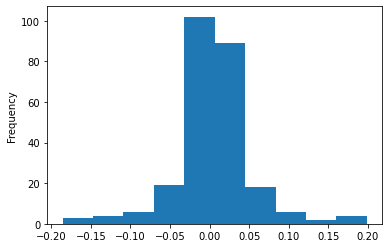

In [6]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
df_daily_returns["TSLA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

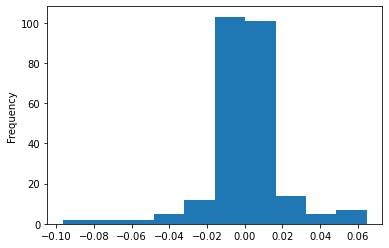

In [7]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
df_daily_returns["KO"].plot.hist()

<AxesSubplot:ylabel='Density'>

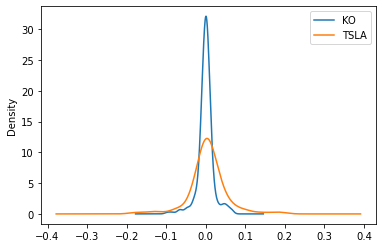

In [8]:
# Visualize the distribution of percent change in closing price for both stocks using a density plot
df_daily_returns.plot.density()